In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4227,ham,Have you started in skye,NaN,NaN,NaN
2150,ham,"The table's occupied, I'm waiting by the tree",NaN,NaN,NaN
647,spam,PRIVATE! Your 2003 Account Statement for shows...,NaN,NaN,NaN
2754,ham,Ok Chinese food on its way. When I get fat you...,NaN,NaN,NaN
1022,ham,We still on for tonight?,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
3225,ham,"Rose for red,red for blood,blood for heart,hea..."
5369,ham,Hi mom we might be back later than &lt;#&gt;
5152,ham,Idk. I'm sitting here in a stop and shop parki...
117,ham,Goodo! Yes we must speak friday - egg-potato r...
3325,ham,Huh so fast... Dat means u havent finished pai...


In [10]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4793,ham,Sorry that was my uncle. I.ll keep in touch
2162,ham,1) Go to write msg 2) Put on Dictionary mode 3...
3175,ham,Havent still waitin as usual... ÌÏ come back s...
2344,ham,Okie...
2564,ham,"Under the sea, there lays a rock. In the rock,..."


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [16]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.shape

(5169, 2)

## 2.EDA

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

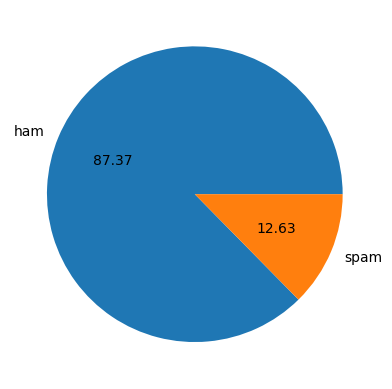

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
# Data is imbalanced

In [23]:
import re
from collections import Counter

def get_most_common_words(text, num_words=10):
    # Convert text to lowercase and extract words using regex
    words = re.findall(r'\b\w+\b', text.lower())

    # Count word frequencies
    word_counts = Counter(words)

    # Return the most common words
    return word_counts.most_common(num_words)

# Example usage
text = """
This is a test. This test is only a test. If this had been an actual emergency, the attention signal you just heard would have been followed by official information.
"""
common_words = get_most_common_words(text)
for word, count in common_words:
    print(f"{word}: {count}")


this: 3
test: 3
is: 2
a: 2
been: 2
only: 1
if: 1
had: 1
an: 1
actual: 1


In [24]:
#num of characters
df['num_characters'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
#num of words
df['num_words'] = df['text'].apply(lambda x: len(x.split()))

In [27]:
#num of sentences
import re
df['num_sentences'] = df['text'].apply(lambda x: len([s for s in re.split(r'[.!?]', x) if s.strip()]))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,2.304508
std,58.236293,11.068488,1.639932
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,31.000000


In [30]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,2.099424
std,56.358207,11.116240,1.510418
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,18.000000,3.000000
max,910.000000,171.000000,31.000000


In [31]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,3.722818
std,30.137753,5.967672,1.792465
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,4.000000
75%,157.000000,28.000000,5.000000
max,224.000000,35.000000,10.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

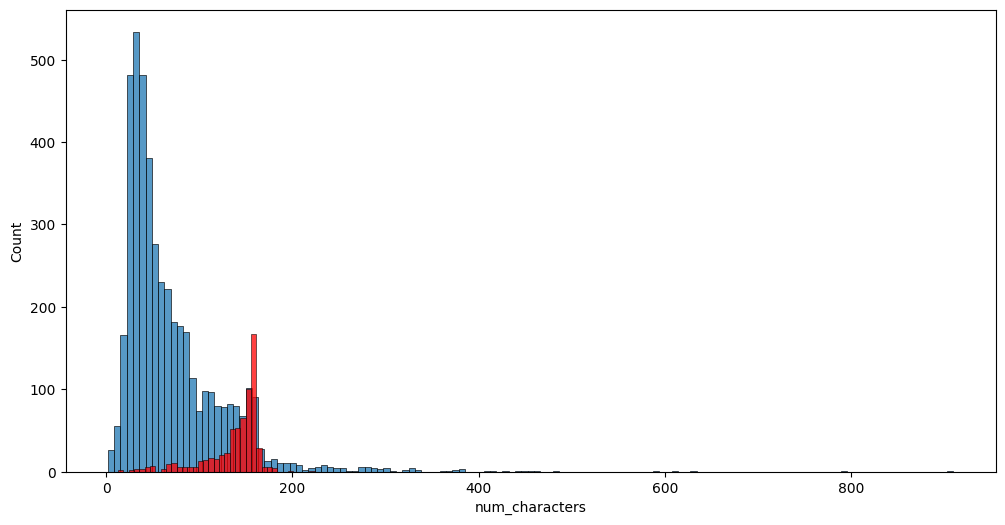

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

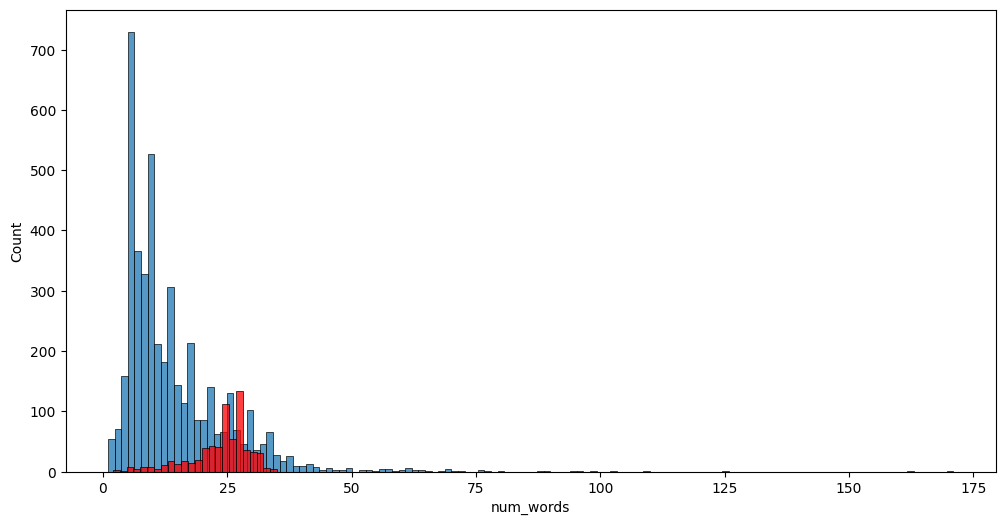

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

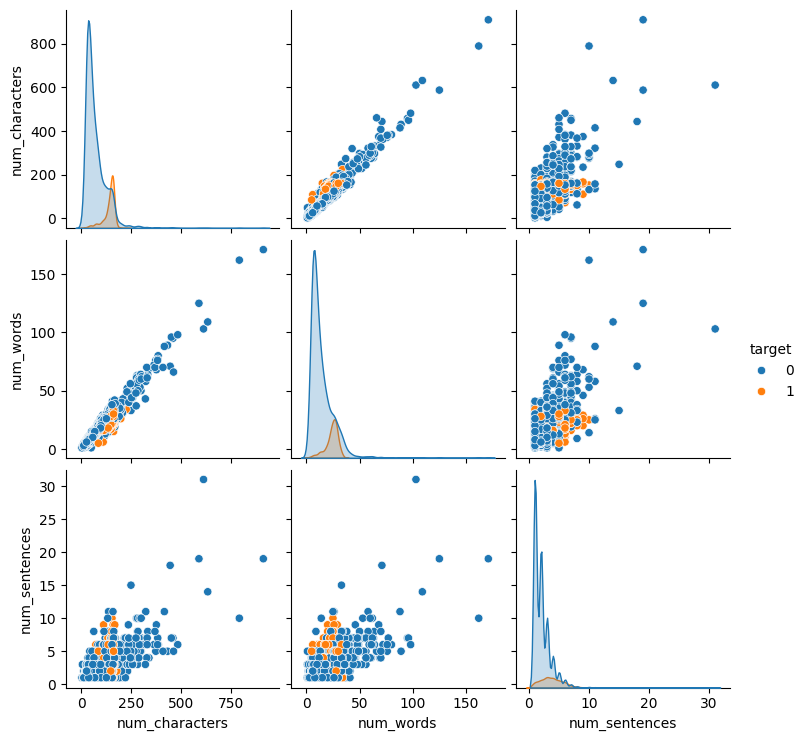

In [35]:
sns.pairplot(df,hue='target')

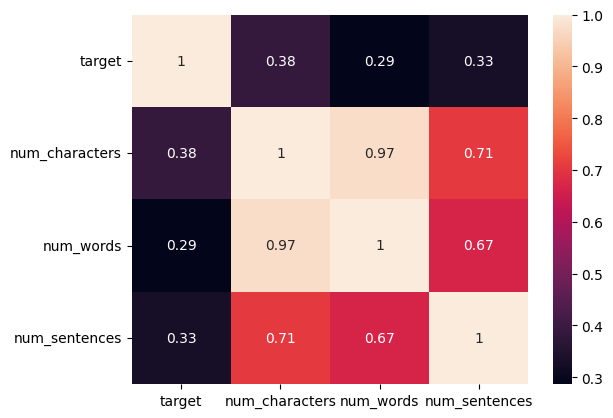

In [36]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute and plot correlation
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [37]:
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem.porter import PorterStemmer  # You can use this part if you still want stemming

ps = PorterStemmer()

def transform_text(text):
    # Lowercase
    text = text.lower()

    # Remove punctuation and tokenize using regex
    words = re.findall(r'\b\w+\b', text)

    # Remove stopwords
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]

    # Apply stemming
    words = [ps.stem(word) for word in words]

    return " ".join(words)

# Example
print(transform_text("I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today."))


m gonna home soon don t want talk stuff anymor tonight k ve cri today


In [38]:
transform_text('i loved to playing badminton')

'love play badminton'

In [39]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [40]:
df['transformed_text'] = df['text'].apply(transform_text)

In [41]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah don t think goe usf live


In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [43]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].astype(str).str.cat(sep=" "))

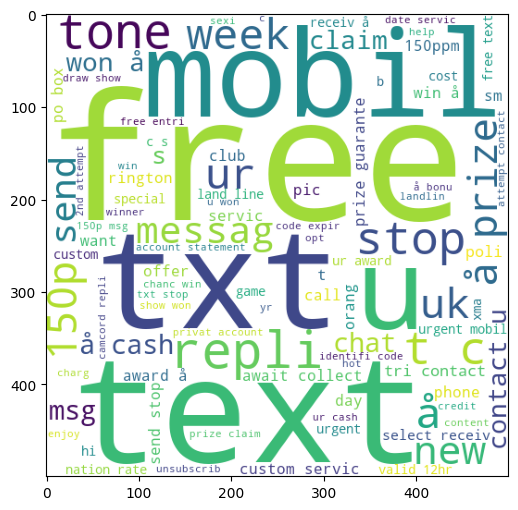

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [45]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].fillna('').astype(str).str.cat(sep=" "))

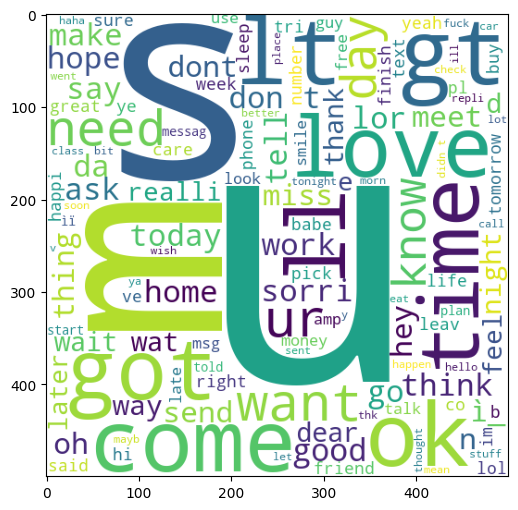

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah don t think goe usf live


In [48]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    spam_corpus.extend(msg)  # Append all words from the list directly

In [49]:
len(spam_corpus)

62474

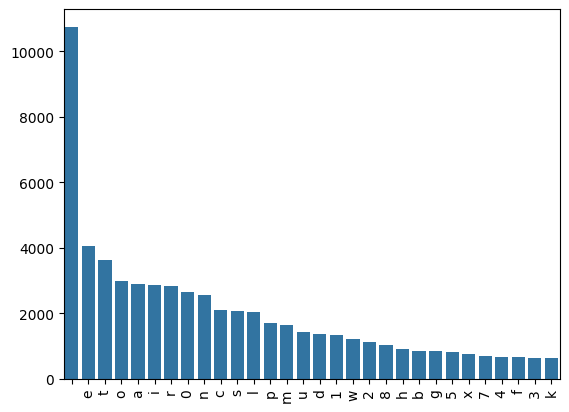

In [50]:
from collections import Counter
# Get the most common words and their frequencies
common_words = Counter(spam_corpus).most_common(30)

# Create the barplot
sns.barplot(x=[item[0] for item in common_words], y=[item[1] for item in common_words])

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [51]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg:  # No need to split since msg is already a list of words
        ham_corpus.append(word)

In [52]:
len(ham_corpus)

168555

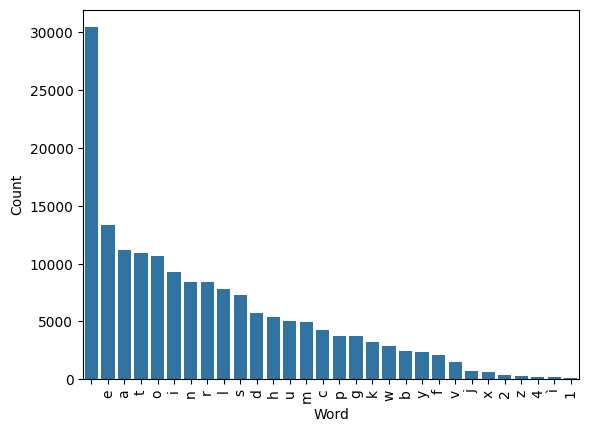

In [53]:
from collections import Counter
# Get the most common words
ham_word_counts = Counter(ham_corpus).most_common(30)

# Create a DataFrame from the word counts
ham_df = pd.DataFrame(ham_word_counts, columns=['Word', 'Count'])

# Create the bar plot
sns.barplot(x='Word', y='Count', data=ham_df)
plt.xticks(rotation='vertical')
plt.show()


In [54]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah don t think goe usf live


## 4. Model Building

In [55]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [56]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [57]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [58]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [59]:
X.shape

(5169, 3000)

In [60]:
y = df['target'].values

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [64]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [65]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[785 111]
 [ 19 119]]
0.5173913043478261


In [66]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.97678916827853
[[896   0]
 [ 24 114]]
1.0


In [67]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9845261121856866
[[894   2]
 [ 14 124]]
0.9841269841269841


In [68]:
# tfidf --> MNB

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [69]:
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [70]:
# clfs = {
#     'SVC' : svc,
#     'KN' : knc, 
#     'NB': mnb, 
#     'DT': dtc, 
#     'LR': lrc, 
#     'RF': rfc, 
#     'AdaBoost': abc, 
#     'BgC': bc, 
#     'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
# }

In [71]:
clfs = {
    'SVC': SVC(kernel='sigmoid', gamma=1.0),
    'NB': MultinomialNB(),
    'LR': LogisticRegression(solver='liblinear', penalty='l1'),
    'RF': RandomForestClassifier(n_estimators=50, random_state=2)
}

In [72]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [73]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9777562862669246, 0.9752066115702479)

In [74]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479
For  NB
Accuracy -  0.97678916827853
Precision -  1.0
For  LR
Accuracy -  0.9593810444874274
Precision -  0.9615384615384616
For  RF
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243


In [75]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [76]:
performance_df

,Algorithm,Accuracy,Precision
1,NB,0.976789,1.000000
3,RF,0.977756,0.983193
0,SVC,0.977756,0.975207
2,LR,0.959381,0.961538


In [77]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [78]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.976789
1,RF,Accuracy,0.977756
2,SVC,Accuracy,0.977756
3,LR,Accuracy,0.959381
4,NB,Precision,1.000000
5,RF,Precision,0.983193
6,SVC,Precision,0.975207
7,LR,Precision,0.961538


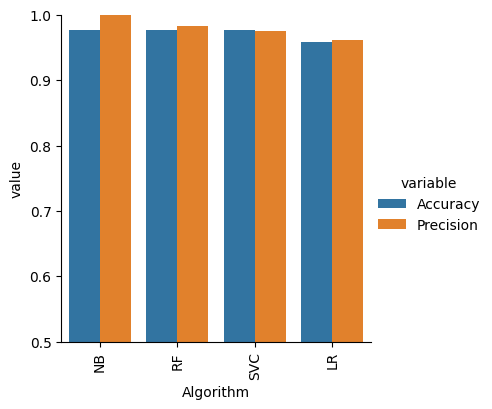

In [79]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=4)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [80]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [81]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [82]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [83]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [84]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [85]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [86]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,NB,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000
1,RF,0.977756,0.983193,0.977756,0.983193,0.977756,0.983193,0.977756,0.983193
2,SVC,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207
3,LR,0.959381,0.961538,0.959381,0.961538,0.959381,0.961538,0.959381,0.961538


In [87]:
from sklearn.ensemble import VotingClassifier

# Re-initialize classifiers
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# Create voting classifier with UNFITTED models
voting = VotingClassifier(estimators=[
    ('svm', svc),
    ('nb', mnb),
    ('et', etc)
], voting='soft')

# ❗❗ Now F I T the VotingClassifier
voting.fit(X_train, y_train)



VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [88]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9845261121856866
Precision 0.9919354838709677


In [89]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, StackingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
import pickle

# Fresh estimators: NEVER reuse previously fitted ones
estimators = [
    ('svm', SVC(kernel='sigmoid', gamma=1.0, probability=True)),
    ('nb', MultinomialNB()),
    ('et', ExtraTreesClassifier(n_estimators=50, random_state=2))
]

# Final estimator
final_estimator = RandomForestClassifier()

# Stacking Classifier
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    passthrough=False,
    cv=5
)

# Fit on training data
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

# Save the model and vectorizer
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(clf, open('model.pkl', 'wb'))


Accuracy: 0.9816247582205029
Precision: 0.9473684210526315
